## Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

## Adjusting the value of kernel

In [ ]:
kernel = tf.constant([[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]])

## Loading the image

In [ ]:
image = tf.io.read_file('basil.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[350, 350])

## Plotting the image

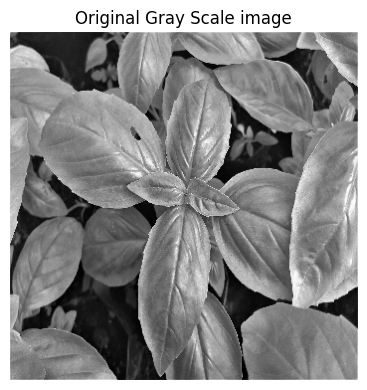

In [ ]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();

## Reforming the image

In [ ]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer

Text(0.5, 1.0, 'Convolution')

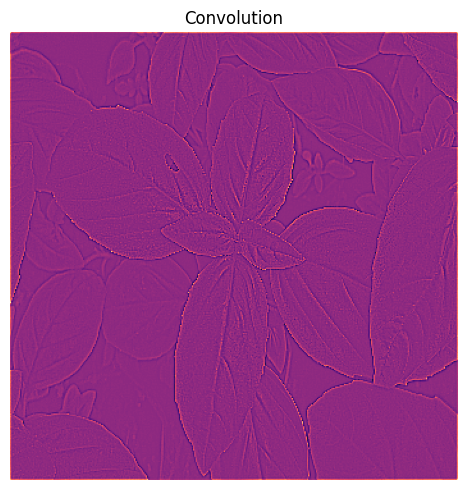

In [ ]:
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
	input=image,
	filters=kernel,
	strides=1, # or (1, 1)
	padding='SAME',
)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.subplot(1, 3, 1)

plt.imshow(
	tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

## Activation layer

In [ ]:
relu_fn = tf.nn.relu

# Image detection

Text(0.5, 1.0, 'Activation')

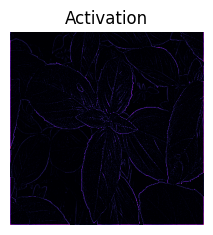

In [ ]:
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(	tf.squeeze(image_detect)
)
plt.axis('off')
plt.title('Activation')

# Pooling layer

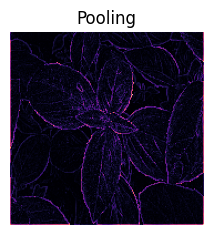

In [ ]:
pool = tf.nn.pool
image_condense = pool(input=image_detect,
							window_shape=(2, 2),
							pooling_type='MAX',
							strides=(2, 2),
							padding='SAME',
							)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()